In [18]:
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt 
import seaborn as sns

In [19]:
picture1 = cv2.imread('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
picture1_RGB = cv2.cvtColor(picture1,cv2.COLOR_BGR2RGB)
picture2 = cv2.cvtColor(picture1_RGB, cv2.COLOR_RGB2HSV_FULL)

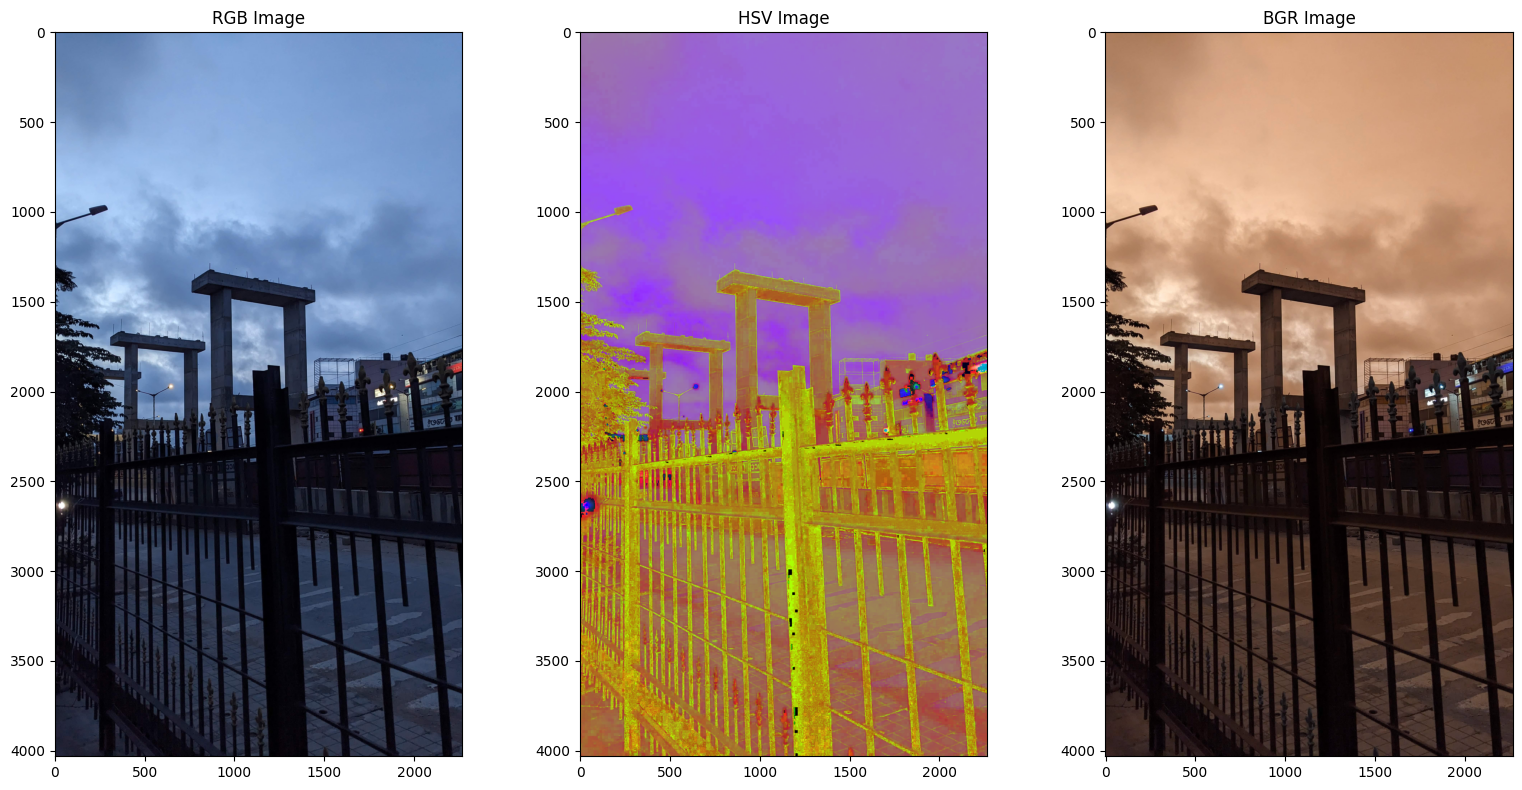

In [24]:
plt.figure(figsize=(16,8))

plt.subplot(1,3,1)
plt.imshow(picture1_RGB)
plt.title('RGB Image')

plt.subplot(1,3,2)
plt.title('HSV Image')
plt.imshow(picture2)

plt.subplot(1,3,3)
plt.title('BGR Image')
plt.imshow(picture1)

plt.tight_layout()
plt.show()

### HSV Plot

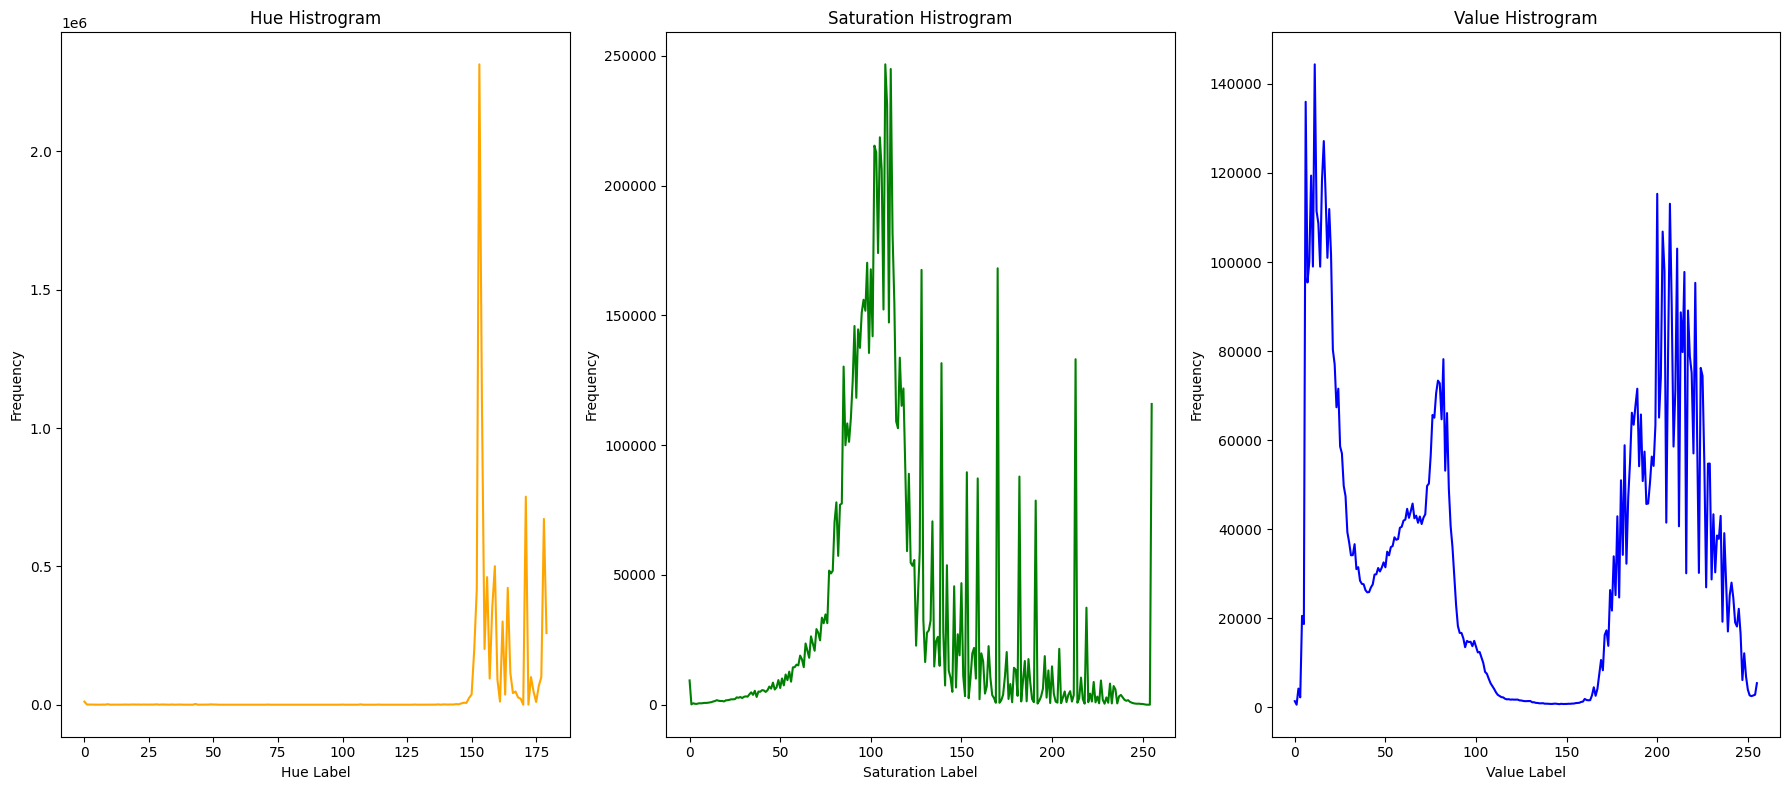

In [21]:
image = cv2.imread('/Users/sumitsaha/Desktop/DataScience_Udemy/ComputerVision/Practice/Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
image_RGB = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
image_HSV = cv2.cvtColor(image_RGB, cv2.COLOR_RGB2HSV_FULL)

hue_hist = cv2.calcHist([image_HSV],[0],None,[180],[0,180])
sat_hist = cv2.calcHist([image_HSV],[1],None,[256],[0,256])
value_hist = cv2.calcHist([image_HSV],[2],None,[256],[0,256])

plt.figure(figsize=(18,8))
plt.subplot(1,3,1)
sns.lineplot(x=np.arange(180),y=hue_hist[:,0],color='orange')
plt.title('Hue Histrogram')
plt.xlabel('Hue Label')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.lineplot(x=np.arange(256),y=sat_hist[:,0],color='green')
plt.title('Saturation Histrogram')
plt.xlabel('Saturation Label')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.lineplot(x=np.arange(256),y=value_hist[:,0],color='blue')
plt.title('Value Histrogram')
plt.xlabel('Value Label')
plt.ylabel('Frequency')
plt.tight_layout() ## Adjust for better spacing between subplot
plt.show()


### RGB Plot

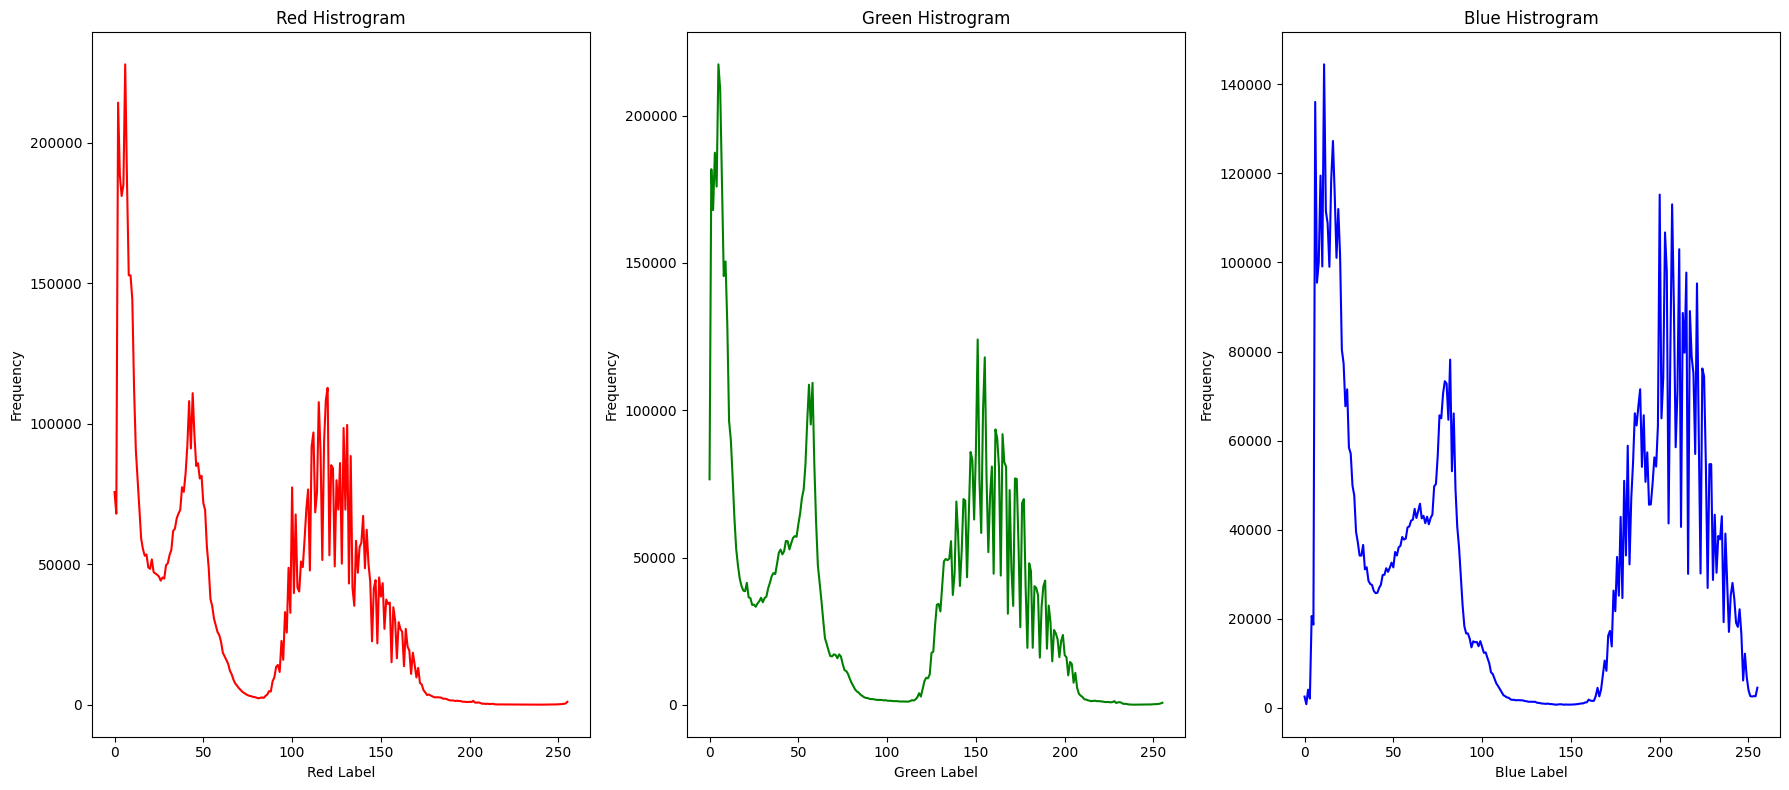

In [22]:
image = cv2.imread('Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
image_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r_hist = cv2.calcHist([image_RGB],[0],None,[256],[0,256])
g_hist = cv2.calcHist([image_RGB],[1],None,[256],[0,256])
b_hist = cv2.calcHist([image_RGB],[2],None,[256],[0,256])

plt.figure(figsize=(18,8))

plt.subplot(1,3,1)
sns.lineplot(x=np.arange(256),y=r_hist[:,0],color='red')
plt.title('Red Histrogram')
plt.xlabel('Red Label')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
sns.lineplot(x=np.arange(256),y=g_hist[:,0],color='green')
plt.title('Green Histrogram')
plt.xlabel('Green Label')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
sns.lineplot(x=np.arange(256),y=b_hist[:,0],color='blue')
plt.title('Blue Histrogram')
plt.xlabel('Blue Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


### Predict Warm vs Cool image

In [47]:
# image = cv2.imread('Temp/GP_PXL_20240926_003004774_with_updated_exif.jpg')
# image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
def warmvscool(file):
    image = cv2.imread(file)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hue = image_HSV[:,:,0]

    warm_mask = (hue>=0) & (hue<=60)
    cool_mask = (hue>=90) & (hue<=180)

    warm_percent = np.sum(warm_mask)/hue.size *100
    cool_percent = np.sum(cool_mask)/hue.size *100

    if warm_percent>cool_percent:
        prediction = 'Warm Image'
    else:
        prediction='Cool Image'

    print(f'Warm Percentage: {round(warm_percent,4)}')
    print(f'Cool Percentage: {round(cool_percent,4)}')
    return prediction

In [48]:
warmvscool('Temp/forest-5038025_1280.jpg')

Warm Percentage: 91.3567
Cool Percentage: 8.525


'Warm Image'

### Dull vs Bright Image Prediction

In [54]:
def dullvsbright(file):
    image = cv2.imread(file)
    image_HSV = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

    saturation = image_HSV[:,:,1]
    value = image_HSV[:,:,2]

    saturation_threshold = 80
    value_threshold = 100

    dull_mask = (saturation<saturation_threshold)&(value<value_threshold)

    dull_percentage = np.sum(dull_mask)/saturation.size *100

    if dull_percentage>50:
        prediction = 'Dull Image'
    else:
        prediction = 'Bright Image'

    print(f'Dull Percentage: {round(dull_percentage,4)}')
    return prediction

In [58]:
dullvsbright('Temp/dull-5369074_1280.jpg')

Dull Percentage: 61.2816


'Dull Image'